In [27]:
# -*- coding: utf-8 -*-
import numpy
import pandas
import matplotlib.pyplot as plt
import datetime

from sklearn import preprocessing
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import LSTM

class Prediction :

    def __init__(self):
        self.length_of_sequences = 50
        self.in_out_neurons = 1
        self.hidden_neurons = 300

    def load_data(self, data, n_prev=50):
        X, Y = [], []
        for i in range(len(data) - n_prev):
            #学習データとラベルを作成
            X.append(data.iloc[i:(i+n_prev)].as_matrix())
            Y.append(data.iloc[i+n_prev].as_matrix())
        retX = numpy.array(X)
        retY = numpy.array(Y)
        return retX, retY


    def create_model(self) :
        model = Sequential()
        #LSTM一層作成
        model.add(LSTM(self.hidden_neurons, \
                  batch_input_shape=(None, self.length_of_sequences, self.in_out_neurons), \
                  return_sequences=False ))
        #全結合層
        model.add(Dense(self.in_out_neurons))
        #活性化関数
        model.add(Activation("linear"))
        #重み更新
        model.compile(loss="mape", optimizer="adam")
        return model


    def train(self, X_train, y_train) :
        model = self.create_model()
        # 学習
        model.fit(X_train, y_train, batch_size=10, nb_epoch=1)
        return model
    
    def set_x_test(self,y_train):
        x_test = y_train[-self.length_of_sequences:]
        np_x_test = numpy.array([x_test])
        return np_x_test
        

In [28]:



if __name__ == "__main__":

    prediction = Prediction()

  # データ準備
    data = None
    #２００７年から2017年までのデータを仕様
    for year in range(2015, 2018):
        #データread
        data_ = pandas.read_csv('csv_stock/stocks_5406-T_1d_' + str(year) +  '.csv',encoding='shift-jis')
        #データをひとまとまりにする
        data = data_ if (data is None) else pandas.concat([data, data_])
    #カラム名変更
    data.columns = ['date', 'open', 'high', 'low', 'close','Price','Buying and selling price']
    data['date'] = pandas.to_datetime(data['date'], format='%Y-%m-%d')
    #2016年9月27以前の株価がおかしいので補正
    data.loc[(data["date"].dt.date <= datetime.date(2016, 9, 27)), 'close'] *= 10
    # 終値のデータを標準化
    data['close'] = preprocessing.scale(data['close'])
    #日でソーティングする
    data = data.sort_values(by='date')
    #インデックスをリセットする
    data = data.reset_index(drop=True)
    #日と終値のみのデータにする。
    data = data.loc[:, ['date', 'close']]


      # 2割をテストデータへ
    split_pos = int(len(data) * 0.8)
    print("data:",data['close'].shape)
    print("split_pos:",split_pos)
    
    x_train, y_train = prediction.load_data(data[['close']].iloc[0:split_pos], prediction.length_of_sequences)
    _,  y_test  = prediction.load_data(data[['close']].iloc[split_pos:], prediction.length_of_sequences)

    model = prediction.train(x_train, y_train)
    
    

data: (701,)
split_pos: 560


/Users/kenji_tachibana/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/keras/models.py:844: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/1
510/510 [==============================] - 11s - loss: 33.5784    


In [41]:
  #続けて予測し時系列データを作る
predicted  =[]
x_test =prediction.set_x_test(y_train)
    
x_test = x_test.reshape([1,50,1])
print(x_test.shape)
for i in range(50):
    pred = model.predict(x_test)
    predicted += pred
    x_test = x_test[1:]+pred
    

(1, 50, 1)


ValueError: Error when checking : expected lstm_5_input to have shape (None, 50, 1) but got array with shape (0, 50, 0)

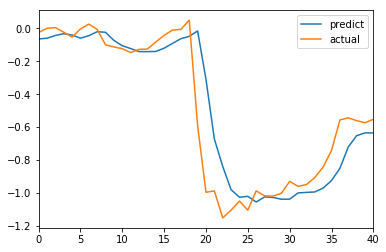

In [5]:
result = pandas.DataFrame(predicted)
result.columns = ['predict']
result['actual'] = y_test
result.plot()
plt.show()

In [37]:
x_train.shape

(510, 50, 1)

In [34]:
x_train.shape

(510, 50, 1)

In [18]:
x_train[0]

array([[ 1.60960636],
       [ 1.41774544],
       [ 1.43906332],
       [ 1.50301696],
       [ 1.48169908],
       [ 1.33247392],
       [ 1.20456664],
       [ 1.20456664],
       [ 1.140613  ],
       [ 1.20456664],
       [ 1.4603812 ],
       [ 1.4603812 ],
       [ 1.39642756],
       [ 1.60960636],
       [ 1.54565272],
       [ 1.69487788],
       [ 1.75883152],
       [ 1.63092424],
       [ 1.5669706 ],
       [ 1.50301696],
       [ 1.39642756],
       [ 1.54565272],
       [ 1.58828848],
       [ 1.65224212],
       [ 1.67356   ],
       [ 1.67356   ],
       [ 1.65224212],
       [ 1.58828848],
       [ 1.63092424],
       [ 1.7801494 ],
       [ 1.90805667],
       [ 1.90805667],
       [ 1.84410304],
       [ 1.90805667],
       [ 2.03596395],
       [ 2.01464607],
       [ 2.16387123],
       [ 2.16387123],
       [ 2.09991759],
       [ 2.12123547],
       [ 2.07859971],
       [ 2.03596395],
       [ 2.07859971],
       [ 2.01464607],
       [ 1.97201031],
       [ 2

In [13]:
data[['close']].iloc[0:split_pos]

,close
0,-6.619254
1,-6.809297
2,-6.788181
3,-6.724834
4,-6.745949
5,-6.893761
6,-7.020456
7,-7.020456
8,-7.083804
9,-7.020456
